In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

## Atmosphere
Following 9905369, first calculate the Fourier transform of the swept beam, the one that SPT uses:
$$ G(\vec\alpha) = \sum_{i=1}^N\, \int d^2\theta e^{i\vec\alpha\cdot \vec\theta} \,e^{-(\vec\theta_i-\vec\theta)^2/2\sigma^2}$$
where
$$\vec\theta_i = [-\frac{N\theta_b}{4} + i\theta_b/2,0].$$
That's roughly right as long as $\theta_b\ll \theta_s$. 

The $\theta_y$ integral can be done:
$$ \int d\theta_y e^{i\theta_y\alpha_y} e^{-\theta_y^2/2\sigma^2}\propto e^{-\sigma^2\alpha_y^2/2}$$
The $\theta_x$ integral also gives this factor but then an additional factor of
$$ \sum_{j=1}^N e^{i \alpha_x \theta_j} = \sum_{j=1}^N e^{ijx}$$ where $x\equiv \alpha_x\theta_b/2$. The sum yields (again apart from a phase)
$$ \frac{1-e^{-iNx}}{1-e^{-ix}} $$ which, when squared becomes
$$\left| G(\vec\alpha)\right|^2 = e^{-\sigma^2\alpha^2} \frac{1-\cos(Nx)}{1-\cos(x)} $$

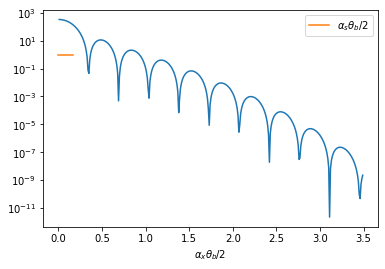

In [3]:
#plot this at $\alpha_y=0$, taking \theta_b/2=\sigma:
x=np.arange(0.01,3.5,.01)
N=50  #2\theta_s/\theta_b
# For PYTHON, 
N=2*10/1.1
y = 1./np.log(2.)
plt.plot(x,np.exp(-y*x**2)*(1-np.cos(N*x))/(1.-np.cos(x)))
plt.yscale('log')
plt.xlabel('$\\alpha_x\\theta_b/2$')
#thetas=N*
plt.plot([0,np.pi/N],[1,1],label='$\\alpha_s\\theta_b/2$')
plt.legend()



Try to understand the statement "In practice, data from the swept ‘slot’ on the sky must to be tapered
at the ends to avoid ‘ringing’ effects in the transform." Do this in 1D by introducing a window function above first in the y-direction. This corresponds to cutting off the integrals: $$ 
\int_0^{\Delta y} d\theta_y e^{i\theta_y\alpha_y} e^{-\theta_y^2/2\sigma^2} = e^{-\sigma^2\alpha_y^2/2} \int_0^{\Delta y} d\theta_y e^{-\frac{(\theta_y-i\alpha)^2}{2\sigma^2}}$$
Maybe simler to break this up into its real and imaginary parts:
$$Re(F) = \int_0^{\Delta y} d\theta_y \cos(\theta_y\alpha_y) e^{-\theta_y^2/2\sigma^2}$$
$$Im(F) = \int_0^{\Delta y} d\theta_y \sin(\theta_y\alpha_y) e^{-\theta_y^2/2\sigma^2}$$
Define $x=\theta_y\alpha_y$. Then,
$$Re(F) = \frac1{\alpha_y}\int_0^{\alpha_y\Delta y} dx \cos(x) e^{-x^2/2\alpha_y^2\sigma^2}$$
$$Im(F) = \frac1{\alpha_y}\int_0^{\alpha_y\Delta y} dx \sin(x) e^{-x^2/2\alpha_y^2\sigma^2}$$



Text(0.5, 0, '$\\alpha_y \\theta_b/2$')

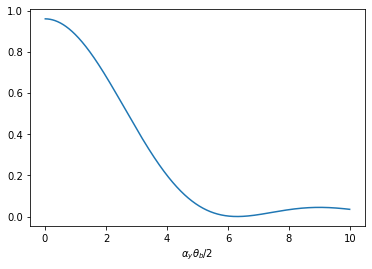

In [18]:
def frint(x,den):
    return np.cos(x)*np.exp(-x**2*.5/den**2)
def fiint(x,den):
    return np.sin(x)*np.exp(-x**2*.5/den**2)

sigma=2./np.log(2.)
alphaarr=np.arange(.01,10.,.01)
g=[]
for alpha in alphaarr:
    den=alpha*sigma
    realf=quad(frint, 0., alpha, args=(den))
    imf=quad(fiint, 0., alpha, args=(den))    
    g.append(realf[0]**2+imf[0]**2)
plt.plot(alphaarr,g/alphaarr**2)
plt.xlabel('$\\alpha_y \\theta_b/2$')

Now do the y-direction. This corresponds to cutting off the integrals: $$ 
\sum_j \int_0^{\Delta y} d\theta_y e^{i\theta_y\alpha_y} e^{-\theta_y^2/2\sigma^2} = e^{-\sigma^2\alpha_y^2/2} \int_0^{\Delta y} d\theta_y e^{-\frac{(\theta_y-i\alpha)^2}{2\sigma^2}}$$
Maybe simler to break this up into its real and imaginary parts:
$$Re(F) = \int_0^{\Delta y} d\theta_y \cos(\theta_y\alpha_y) e^{-\theta_y^2/2\sigma^2}$$
$$Im(F) = \int_0^{\Delta y} d\theta_y \sin(\theta_y\alpha_y) e^{-\theta_y^2/2\sigma^2}$$
Define $x=\theta_y\alpha_y$. Then,
$$Re(F) = \frac1{\alpha_y}\int_0^{\alpha_y\Delta y} dx \cos(x) e^{-x^2/2\alpha_y^2\sigma^2}$$
$$Im(F) = \frac1{\alpha_y}\int_0^{\alpha_y\Delta y} dx \sin(x) e^{-x^2/2\alpha_y^2\sigma^2}$$
